In [4]:
import cv2
import numpy as np
from PIL import Image
from functools import reduce
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import argparse
import datetime
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from sklearn.cluster import MeanShift, estimate_bandwidth
import math
import random
from scipy.spatial import distance
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Image 1


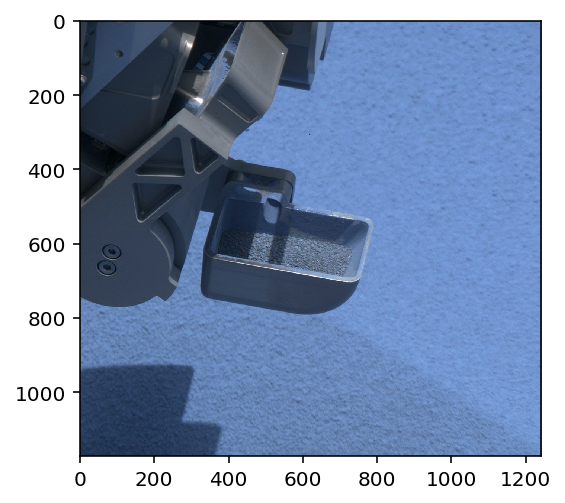

In [5]:
#input of the image
whatimg=int(input("Image"))
if whatimg==1:
    img = cv2.imread('image1.tif')
    height,width=img.shape[0],img.shape[1]
    Img=img[10:height-15,170:width-180]
    plt.imshow(Img)
elif whatimg==2:
    img = cv2.imread('image2.tif')
    height,width=img.shape[0],img.shape[1]
    Img=img[10:height-10,10:width-10]
    plt.imshow(Img)
elif whatimg==3:
    img = cv2.imread('image3.tif')
    height,width=img.shape[0],img.shape[1]
    Img=img[10:height-15,170:width-180]
    plt.imshow(Img)
elif whatimg==4:
    img = cv2.imread('image4.tif')
    height,width=img.shape[0],img.shape[1]
    Img=img[10:height-10,10:width-10]
    plt.imshow(Img)

Color Mode(RGB,HSV,Lab,yCrCb,XYZ,LUV,YUV,gray): RGB


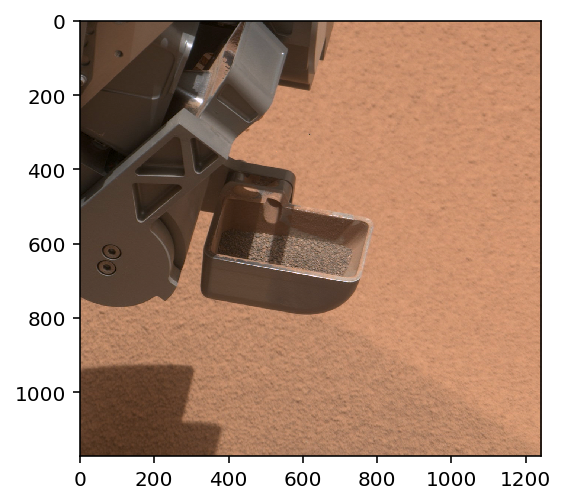

In [6]:
#color space transformation
colorsp=input("Color Mode(RGB,HSV,Lab,yCrCb,XYZ,LUV,YUV,gray):")
if colorsp=="RGB":
    Imag = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB )
    plt.imshow(Imag)
elif colorsp=="HSV":
    Imag = cv2.cvtColor(Img, cv2.COLOR_BGR2HSV )
    plt.imshow(Imag)
elif colorsp=="Lab":
    Imag = cv2.cvtColor(Img, cv2.COLOR_BGR2LAB )
    plt.imshow(Imag)
elif colorsp=="yCrCb":
    Imag = cv2.cvtColor(Img, cv2.COLOR_BGR2YCrCb)
    plt.imshow(Imag)
elif colorsp=="XYZ":
    Imag = cv2.cvtColor(Img, cv2.COLOR_BGR2XYZ)
    plt.imshow(Imag)   
elif colorsp=="LUV":
    Imag = cv2.cvtColor(Img, cv2.COLOR_BGR2LUV)
    plt.imshow(Imag)
elif colorsp=="YUV":
    Imag = cv2.cvtColor(Img, cv2.COLOR_BGR2YUV)
    plt.imshow(Imag)
elif colorsp=="gray":
    Imag = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
    plt.imshow(Imag) 

Felzenszwalb's number of segments: 1300
Slic number of segments: 221
Quickshift number of segments: 4790


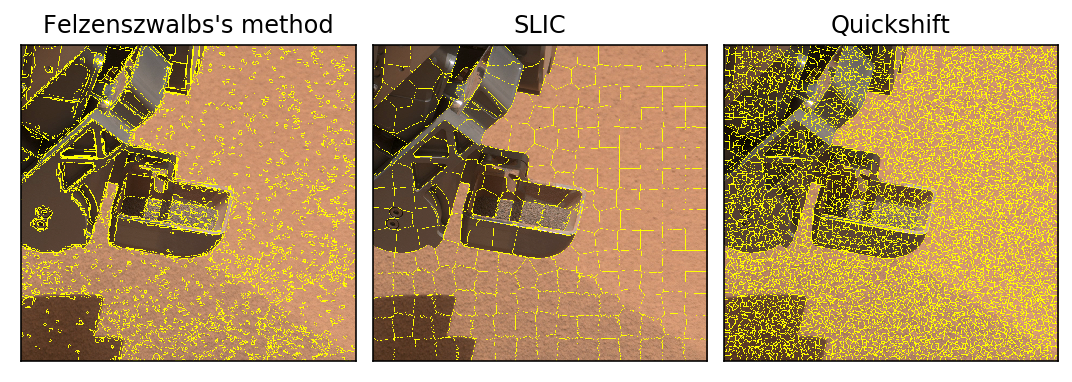

In [7]:
#img = img_as_float(Imag()[::2, ::2])
segments_fz = felzenszwalb(Imag, scale=100, sigma=0.5, min_size=50)
#if k is small, can be oversegmentation-superpixel
segments_slic = slic(Imag, n_segments=250, compactness=10, sigma=1)
segments_quick = quickshift(Imag, kernel_size=3, max_dist=6, ratio=0.5)
#The parameter scale sets an observation level. Higher scale means less and larger segments. 
#sigma is the diameter of a Gaussian kernel, used for smoothing the image prior to segmentation.
print("Felzenszwalb's number of segments: %d" % len(np.unique(segments_fz)))
print("Slic number of segments: %d" % len(np.unique(segments_slic)))
print("Quickshift number of segments: %d" % len(np.unique(segments_quick)))
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(8, 3, forward=True)
fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, 0.05, 0.05)

ax[0].imshow(mark_boundaries(Imag, segments_fz))
ax[0].set_title("Felzenszwalbs's method")
ax[1].imshow(mark_boundaries(Imag, segments_slic))
ax[1].set_title("SLIC")
ax[2].imshow(mark_boundaries(Imag, segments_quick))
ax[2].set_title("Quickshift")
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

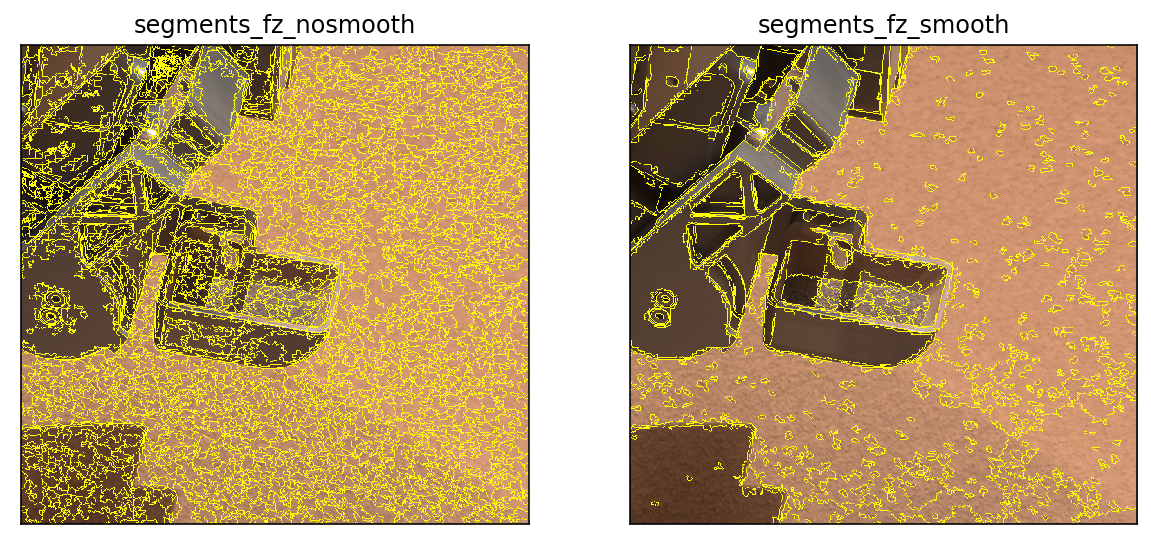

In [8]:
#Felzenszwalb's segmentation with or without smoothing
segments_fz_nosmooth = felzenszwalb(Imag, scale=100, sigma=0, min_size=100)
segments_fz_smooth= felzenszwalb(Imag, scale=100, sigma=0.5, min_size=100)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 8, forward=True)
#fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, 0.05, 0.05)

ax[0].imshow(mark_boundaries(Imag, segments_fz_nosmooth))
ax[0].set_title("segments_fz_nosmooth")
ax[1].imshow(mark_boundaries(Imag, segments_fz_smooth))
ax[1].set_title("segments_fz_smooth")

for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

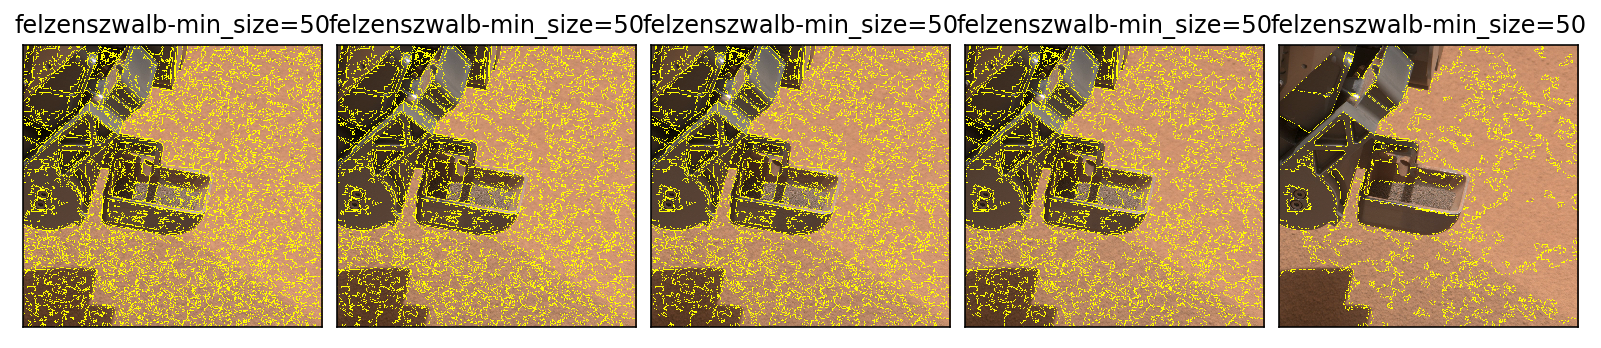

In [9]:
#different scale-the larger the scale, the larger the segmentation
segments_fz_s10 = felzenszwalb(Imag, scale=500, sigma=0, min_size=50)
segments_fz_s100 = felzenszwalb(Imag, scale=500, sigma=0, min_size=100)
segments_fz_s500 = felzenszwalb(Imag, scale=500, sigma=0, min_size=150)
segments_fz_s1000 = felzenszwalb(Imag, scale=500, sigma=0, min_size=200)
#smoothing more,sigma-not spurious segments
segments_fz_s10000 = felzenszwalb(Imag, scale=10000, sigma=0, min_size=300)
#two type of graphs in felzenszwalb
#assuming 8 neighbors, 


fig, ax = plt.subplots(1, 5)
fig.set_size_inches(12, 5, forward=True)
fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, 0.05, 0.05)

ax[0].imshow(mark_boundaries(Imag, segments_fz_s10))
ax[0].set_title("felzenszwalb-min_size=50")
ax[1].imshow(mark_boundaries(Imag, segments_fz_s100))
ax[1].set_title("felzenszwalb-min_size=50")
ax[2].imshow(mark_boundaries(Imag, segments_fz_s500))
ax[2].set_title("felzenszwalb-min_size=50")
ax[3].imshow(mark_boundaries(Imag, segments_fz_s1000))
ax[3].set_title("felzenszwalb-min_size=50")
ax[4].imshow(mark_boundaries(Imag, segments_fz_s10000))
ax[4].set_title("felzenszwalb-min_size=50")

for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

In [10]:
from plot_rag_merge import _weight_mean_color, merge_mean_color
from skimage import data, segmentation, filters, color,io
from skimage.future import graph
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Initial RAG over superpixels based on mean colors')

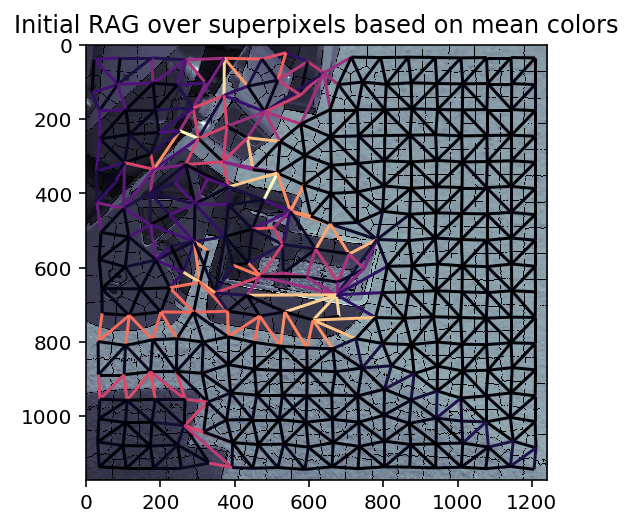

In [15]:
labels = segmentation.slic(Imag,  n_segments=300, compactness=10, sigma=0.8)
g = graph.rag_mean_color(Imag, labels) 
graph.show_rag(labels, g, Imag)
plt.title('Initial RAG over superpixels based on mean colors')
#superpixels

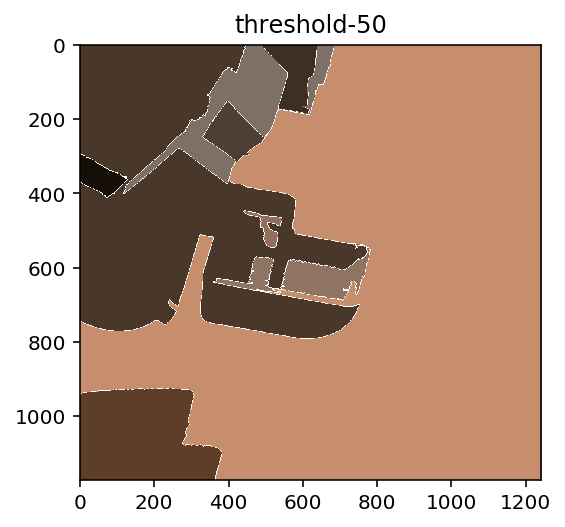

In [16]:
labels = segmentation.slic(Imag, n_segments=300, compactness=10, sigma=0.8)
g = graph.rag_mean_color(Imag, labels)
labels2 = graph.merge_hierarchical(labels, g, thresh=50, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)
g2 = graph.rag_mean_color(Imag, labels2)

out = color.label2rgb(labels2, Imag, kind='avg')
out = segmentation.mark_boundaries(out, labels2, (1, 1, 1))
plt.imshow(out)
plt.title("threshold-50")
io.show()

In [17]:
#k-mean clustering prior to segmentation

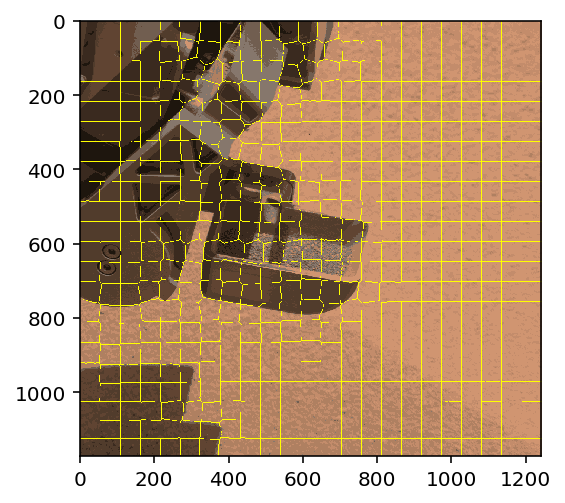

In [18]:
reshapedImage = np.float32(Imag.reshape(-1, 3)) #conver the input (m,n,3) shape into (m*n,3) shape
numberOfClusters = 10
#define the number of cluster 
stopCriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.5)# either stop when there's no significant change after an iteration or when a big number of iterations has passed
ret, labels, clusters = cv2.kmeans(reshapedImage, numberOfClusters, None, stopCriteria, 10, cv2.KMEANS_RANDOM_CENTERS)
clusters = np.uint8(clusters)
intermediateImage = clusters[labels.flatten()]
clusteredImage = intermediateImage.reshape((Imag.shape))
segments_slic = segmentation.slic(clusteredImage, n_segments=500, compactness=100, sigma=0.8)
plt.imshow(segmentation.mark_boundaries(clusteredImage, segments_slic))

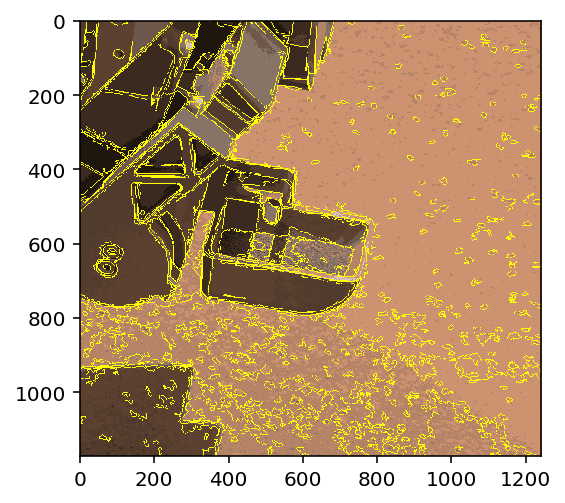

In [19]:
reshapedImage = np.float32(Imag.reshape(-1, 3)) #conver the input (m,n,3) shape into (m*n,3) shape
numberOfClusters = 10
#define the number of cluster 
stopCriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.5)# either stop when there's no significant change after an iteration or when a big number of iterations has passed
ret, labels, clusters = cv2.kmeans(reshapedImage, numberOfClusters, None, stopCriteria, 10, cv2.KMEANS_RANDOM_CENTERS)
clusters = np.uint8(clusters)
intermediateImage = clusters[labels.flatten()]
clusteredImage = intermediateImage.reshape((Imag.shape))
segments_fz = segmentation.felzenszwalb(Imag, scale=100, sigma=0.8, min_size=100)
plt.imshow(segmentation.mark_boundaries(clusteredImage, segments_fz))

In [20]:
#normalized cut

In [ ]:
labels1 = segmentation.slic(Imag, compactness=100, n_segments=5000)
out1 = color.label2rgb(labels1, Imag, kind='avg', bg_label=0)#Return an RGB image where color-coded labels are painted over the image.

g = graph.rag_mean_color(Imag, labels1, mode='similarity')#Compute the Region Adjacency Graph using mean colors.
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, Imag, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

In [ ]:
labels1 = segmentation.felzenszwalb(Imag, scale=4000, sigma=0.8, min_size=200)
out1 = color.label2rgb(labels1, Imag, kind='avg', bg_label=0)#Return an RGB image where color-coded labels are painted over the image.

g = graph.rag_mean_color(Imag, labels1, mode='similarity')#Compute the Region Adjacency Graph using mean colors.
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, Imag, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()